In [1]:
import datetime

import RunStrategy
import atomic as atom
import definitions as defs
from pathlib import Path
import pandas as pd
import strategies
import reporting as rep
import warnings
import GetConfigs
import time
import DefaultConfigs as defcon
import OptimizedConfigs as opcon

warnings.filterwarnings("ignore")

user = "SD"

year = 2023
startmonth = 1
endmonth = 3
start_date = datetime.date(year, startmonth, 1)
end_date = datetime.date(year, endmonth, 17)

if user == "SD":
  Root = "D:/Work/Sykes and Ray/"
  Result_path = "D:/Work/Sykes and Ray/NIFTYOptionsData/OptionsData/Results/"
elif user == "RI":
  Root = "../"
  Result_path = "Results/IND/Test/"

# Banknifty_Path = Root + "NIFTYOptionsData/Resampled Data/Banknifty/"
# Nifty_Path = Root + "NIFTYOptionsData/Resampled Data/Nifty/"
# Finnifty_Path = Root + "NIFTYOptionsData/Resampled Data/Finnifty/"


Banknifty_Path = Root + "NIFTYOptionsData/OptionsData/Banknifty/"
Nifty_Path = Root + "NIFTYOptionsData/OptionsData/Nifty/"
Finnifty_Path = Root + "NIFTYOptionsData/OptionsData/Finnifty/"

# Default Config
config = defcon.ind_straddle_N_OLS

config.update({ 'EnterTime':datetime.time(10, 30), 'Delta':0, 'DeltaThu':0, 'ExitTime': datetime.time(14, 30)}) # 
#configs = [defcon.ind_straddle_BN_OL1, defcon.ind_straddle_N_OL1, defcon.ind_straddle_BN_AL, defcon.ind_straddle_N_AL,
#           defcon.ind_straddle_BN_OL_RE, defcon.ind_straddle_N_OL_RE, defcon.ind_straddle_BN_ALS, defcon.ind_straddle_N_ALS]
approach = "INDOLSFN"
#approachVec = ["INDOLBN", "INDOLN", "INDALBN", "INDALN", "INDOLREBN", "INDOLREN", "INDALSBN", "INDALSN"]
trades, PnL = RunStrategy.RunIntradayStrategy(start_date, end_date, config, Banknifty_Path, Nifty_Path, Finnifty_Path)
print("\n")
# print(trades)
# trades.to_csv(Result_path + approach + "trades.csv")

print("\n")
Daily_Chart = rep.GetDailyChart(trades)
# print(Daily_Chart)
# Daily_Chart.to_csv(Result_path + approach + "DailyChart.csv")

print("\n")
report = rep.Report(trades, Daily_Chart)
print(report)
# report.to_csv(Result_path + approach + "Report.csv")

print("\n")
weeklyreport = rep.WeeklyBreakDown(Daily_Chart)
print(weeklyreport)
# weeklyreport.to_csv(Result_path + approach + "WeeklyReport.csv")

print("\n")
monthlyreport = rep.MonthlyBreakDown(Daily_Chart)
print(monthlyreport)

print("\n")
dayofweek = rep.DayOfWeek(Daily_Chart)
print(dayofweek)

# print(PnL)

Time taken to run this Strategy  18.958927392959595






        Overall Profit  Avg Expiry Profit  Avg Day Profit   Max Profit  \
Option    14995.657169                NaN      282.936928  2716.125469   

           Max Loss  Total Expiries  Win% Trades  Loss% Trades  Win% Days  \
Option -1604.630903               0     0.235849      0.764151   0.471698   

        Loss% Days  ...  Avg Loss On Loss Days  Max Drawdown(MDD)  \
Option    0.528302  ...            -696.412049       -4978.296559   

        Return to MDD Ratio  Expectancy  0 SL/TP Hit Count  1 SL/TP Hit Count  \
Option            -3.012206     0.33776                  1                 24   

        2 SL/TP Hit Count  Max_Winning_Streak  Max_Losing_Streak  Lot Size  
Option                 28                 NaN                 10         2  

[1 rows x 23 columns]


              Daily pnl
date                   
2023-01-06  4092.737156
2023-01-13  4853.849984
2023-01-20  3347.966397
2023-01-27  -384.505422
2023-02-03 -1

In [2]:
PnL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19877 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       19877 non-null  datetime64[ns]
 1   1       19877 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 465.9 KB


In [ ]:
PnL.set_index(0, inplace=True)


In [18]:
for date in pd.Series(PnL.index.date).unique():
    DayPnL = PnL.loc[str(date)]
    EODPnL = DayPnL.iloc[-1].values
    print((EODPnL[0]))
    break

-860.2913031249983


<Axes: xlabel='0'>

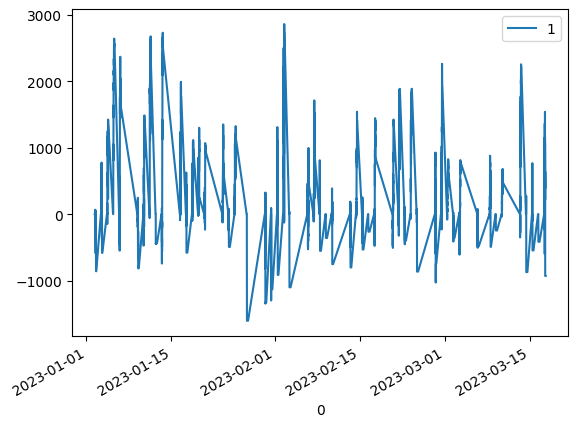

In [19]:
PnL.plot()